In [1]:
#************************* MAIN SCRIPT **********************************
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata

In [2]:
#path of the simulation directory
path = '/Users/ajc/FUSE/simulations/tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/transport-logical/'

In [3]:
# Read PFOTRAN standalone data
#pflotran_file = os.path.join(path, 'data/pflotran_out/decay_ingrowth.tec')
#pflotran_data = dict()
#pflotran_data['time'] = np.loadtxt(pflotran_file,usecols=0,skiprows=6) #time in hours
#pflotran_data['Tracer 1'] = np.loadtxt(pflotran_file,usecols=1,skiprows=6)  # Tracer 1

In [4]:
F= ['prun1','prun2','prun3']
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
vars = ['surface-total_component_concentration']#, 'surface-total_component_concentration']
#Suffix = ['.cell.Tracer1 conc', '.cell.Tracer2 conc']
Suffix = ['.cell.Tracer1', '.cell.Tracer2']

/Users/ajc/FUSE/simulations/tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/transport-logical/prun1/visdump_surface_data.h5
/Users/ajc/FUSE/simulations/tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/transport-logical/prun2/visdump_surface_data.h5
/Users/ajc/FUSE/simulations/tests/ats-transport-subgrid-testsuite/tests/logical-surface-twoway/transport-logical/prun3/visdump_surface_data.h5


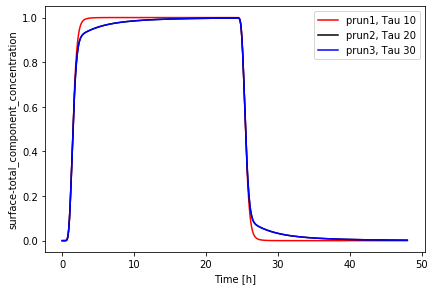

In [6]:

fig, axs = plt.subplots(1,1, figsize=(6,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
#axs = axs.ravel()
Colors = ['r','k','b','b','c','m']
F_L = ['Tracer 1', 'Tracer 2']
sum1 = 0
marks = ['-.', '*']
Taus = [10, 20, 30]
for i, v in enumerate(vars):
    plt.subplot(111)
    for j,f in enumerate(Files):
        print (f)
        data = np.array(readdata.GetSurfVarFromVis(f,v,cellid=-1,suffix=Suffix[i])[v])
        Time = np.array([120*i/3600. for i in range(len(data))])
        #plt.plot(Time, 1.e0*data,color=Colors[i],label=F_L[i]) # convert ATS moles/second to Pflotran moles/litre
        
        plt.plot(Time, 1.e0*data,color=Colors[j],label=F[j] + ', Tau ' +str(Taus[j])) # convert ATS moles/second to Pflotran moles/litre

    plt.ylabel(vars[i])
    
    plt.xlabel('Time [h]')

#plt.plot(pflotran_data['time'], pflotran_data['Tracer 1'],'r',linestyle='--',label='PFLOTRAN Tracer 1')
#plt.plot(pflotran_data['time'], pflotran_data['Tracer 2'],'k',linestyle='--',label='PFLOTRAN Tracer 2')
plt.legend(loc='upper right',fontsize=10)
#plt.title('Two identical tracers  (same exchange/external_sources)')
#plt.title('Tracer1: (Q1 = 0.1, alpha_1 =1.7e-5),\n Tracer2: (Q2 = 0.1, alpha_2 =1.7e-4)')

plt.show()

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
Colors = ['r','k','b','b','c','m']
Colors_sg = ['c','m','g']
F_L = ['Tracer 1', 'Tracer 2']
def subgrid_C(sg_file,sg_var, suff):
    sgC_data = readdata.GetSurfVarFromVis_All(sg_file,sg_var,suffix=suff)
    sgConcentration = sgC_data[sg_var]
    #print ('subgrid C: ',sgConcentration)
    return sgConcentration

sum1 = 0
ncells = 9
for i, v in enumerate(vars):
    #print (v)
    #print (v, Suffix[i])
    plt.subplot(121)
    
    dat1 = np.array(readdata.GetSurfVarFromVis(Files[0],v,cellid=ncells,suffix=Suffix[0])[v])
    dat2 = np.array(readdata.GetSurfVarFromVis(Files[0],v,cellid=ncells,suffix=Suffix[1])[v])
    data = dat1 + dat2
    Time = np.array([900*i/3600. for i in range(len(data))])
    if i ==0:
        plt.plot(Time, 1.e-3*data,color=Colors[2],label='total concent. %s'%(np.round(1e-3*data[-1],5)))
    plt.plot(Time, 1.e-3*dat1,color=Colors[0],label='%s: %s'%(F_L[0],np.round(1e-3*dat1[-1],5)))
    plt.plot(Time, 1.e-3*dat2,color=Colors[1],label='%s: %s'%(F_L[1],np.round(1e-3*dat2[-1],5)))
    sum1 = sum1 + 1e-3*data[-1]
    print ('surface:', sum1,1e-3*data[-1])
    plt.ylabel(vars[i])
    
    plt.xlabel('Time [h]')
    plt.title('stream')
    plt.legend()
    break
plt.subplot(122)
xnum = 100
R = [0, int(ncells/2),ncells]
i = 0
for x1 in R:
    
    sg_infile = os.path.join(path,F[0],'visdump_subgrid_%s_data.h5'%x1)
    sg_var='subgrid_%s-total_component_concentration'%x1
    dat1 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[0])#[k][::-1]
    dat2 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[1])#[k][::-1]
    dat = dat1 + dat2
    data = 1e-3*np.reshape(dat,(-1,10)).mean(axis=1) #sum-up all subgrid cells
    
    print (sg_var, dat.shape, data[-1])
    plt.plot(Time, data,color=Colors[i], label='subgrid_%s  (Concent. %s)'%(x1,np.round(data[-1],4)))
    
    if (i ==2):
        dat11 = 1e-3*np.reshape(dat1,(-1,10)).mean(axis=1)
        dat11a = 1e-3*np.reshape(dat1,(-1,10))
        #print (dat11a)
        dat11 = [d[0] for d in dat11a]
        plt.plot(Time, dat11,'*',color=Colors_sg[i-1],label='subgrid_%s  (Tc1. %s)'%(x1,np.round(dat11[-1],4)))
        dat21 = 1e-3*np.reshape(dat2,(-1,10)).mean(axis=1)
        plt.plot(Time, dat21,'.',color=Colors_sg[i],label='subgrid_%s  (Tc2. %s)'%(x1,np.round(dat21[-1],4)))
    i = i +1
plt.title('subgrid')
plt.legend(loc='lower right', fontsize=9)
plt.show()


In [ ]:
fig, axs = plt.subplots(1,3, figsize=(14,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1,1,1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
Colors = ['r','k','b','b','c','m']
Colors_sg = ['r','k','g']
F_L = ['Tracer 1', 'Tracer 2']
def subgrid_C(sg_file,sg_var, suff):
    sgC_data = readdata.GetSurfVarFromVis_All(sg_file,sg_var,suffix=suff)
    sgConcentration = sgC_data[sg_var]
    #print ('subgrid C: ',sgConcentration)
    return sgConcentration

sum1 = 0
ncells = 9
for i, v in enumerate(vars):
    #print (v)
    #print (v, Suffix[i])
    plt.subplot(131)
    
    dat1 = np.array(readdata.GetSurfVarFromVis(Files[0],v,cellid=ncells,suffix=Suffix[0])[v])
    dat2 = np.array(readdata.GetSurfVarFromVis(Files[0],v,cellid=ncells,suffix=Suffix[1])[v])
    data = dat1 + dat2
    Time = np.array([900*i/3600. for i in range(len(data))])
    if i ==0:
        plt.plot(Time, 1.e-3*data,color=Colors[2],label='total concent. %s'%(np.round(1e-3*data[-1],5)))
    plt.plot(Time, 1.e-3*dat1,color=Colors[0],label='%s: %s'%(F_L[0],np.round(1e-3*dat1[-1],5)))
    plt.plot(Time, 1.e-3*dat2,color=Colors[1],label='%s: %s'%(F_L[1],np.round(1e-3*dat2[-1],5)))
    sum1 = sum1 + 1e-3*data[-1]
    print ('surface:', sum1,1e-3*data[-1])
    plt.ylabel(vars[i])
    
    plt.xlabel('Time [h]')
    plt.title('stream')
    plt.legend()
    break
plt.subplot(132)
xnum = 100
R = [0, ncells]
i = 0
n_taus = 10
for x1 in R:
    
    sg_infile = os.path.join(path,F[0],'visdump_subgrid_%s_data.h5'%x1)
    sg_var='subgrid_%s-total_component_concentration'%x1
    dat1 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[0])#[k][::-1]
    dat2 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[1])#[k][::-1]
    dat = dat1 + dat2
    data = 1e-3*np.reshape(dat,(-1,n_taus)).mean(axis=1) #sum-up all subgrid cells
    
    print (sg_var, dat.shape, data[-1])
    plt.plot(Time, data,color=Colors[i], label='sg_%s  (Concent. %s)'%(x1,np.round(data[-1],4)))
    
    if (i ==1):
        dat11 = 1e-3*np.reshape(dat1,(-1,n_taus)).mean(axis=1)
        dat11a = 1e-3*np.reshape(dat1,(-1,n_taus))
        #print (dat11a)
        dat11 = [d[0] for d in dat11a]
        plt.plot(Time, dat11,'*',color=Colors_sg[i-1],label='sg_%s  (Tc1. %s)'%(x1,np.round(dat11[-1],4)))
        dat21 = 1e-3*np.reshape(dat2,(-1,n_taus)).mean(axis=1)
        plt.plot(Time, dat21,'.',color=Colors_sg[i],label='sg_%s  (Tc2. %s)'%(x1,np.round(dat21[-1],4)))
    i = i +1
plt.title('subgrid. Tracer 1 and 2 at sg_cell 0')
plt.legend(loc='lower right', fontsize=9)
plt.subplot(133)
i = 0
for x1 in R:
    
    sg_infile = os.path.join(path,F[0],'visdump_subgrid_%s_data.h5'%x1)
    sg_var='subgrid_%s-total_component_concentration'%x1
    dat1 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[0])#[-1][::-1]
    dat2 = subgrid_C(sg_file=sg_infile,sg_var=sg_var, suff=Suffix[1])#[-1][::-1]
    #dat = dat1 + dat2
    #data = 1e-3*np.reshape(dat,(-1,10)).mean(axis=1) #sum-up all subgrid cells
    
    #print (sg_var, dat.shape, data[-1])
    #plt.plot(Time, data,color=Colors[i], label='subgrid_%s  (Concent. %s)'%(x1,np.round(data[-1],4)))
    
    if (i ==1 or i ==0):
        #dat11 = 1e-3*np.reshape(dat1,(-1,10)).mean(axis=1)
        dat11a = 1e-3*np.reshape(dat1,(-1,n_taus))
        #print (dat11a)
        dat11 = dat11a[-1]
        plt.plot(dat11,'*',color=Colors_sg[i],label='sg_%s  (Tc1. %s)'%(x1,np.round(np.max(dat11),4)))
        #dat21 = 1e-3*np.reshape(dat2,(-1,10)).mean(axis=1)
        dat21a = 1e-3*np.reshape(dat2,(-1,n_taus))
        dat21 = dat21a[-1]
        plt.plot(dat21,'.',color=Colors_sg[i],label='sg_%s  (Tc2. %s)'%(x1,np.round(np.max(dat21),4)))
    i = i +1
plt.title('subgrid')


plt.legend(loc='best', fontsize=9)
plt.show()


In [ ]:
What is your criterea for mcmc convergence

Different initial values for parameters

Predictive uncertainty.

Did you pick all data from location 3 – are you matching 

Instead of using just one observed tracer, did you try 

Adam ward 2016


In [ ]:
there is no reason to believe it will not work
I will echo your comment
We are working with one data set, but are not marry to it